# Lademanagementsimulation   


### Simulations Eingangsdaten

In [5]:
import simulationInputDataVisualisation
simulationInputDataVisualisation.create_jupyter_dash_app(solarpeakleistung)

#### Quadratische Interpolation der verfügbaren Solarleistung

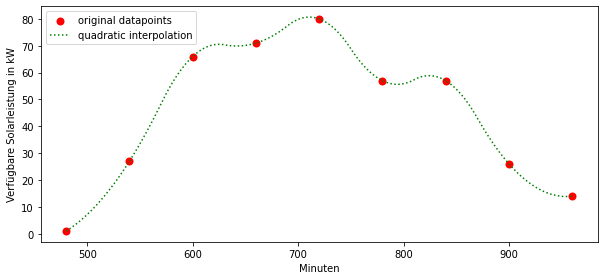

In [6]:
import figureGeneration

figureGeneration.create_available_solar_power_figure_quadratic_interpolation(solarpeakleistung)

### Simulations Eingabeparameter

In [1]:
solarpeakleistung = 150 #Einheit Kilowattpeak (kWP)
anzahl_bevs_pro_tag = 100
ladeleistung_pro_bev = 11 #Einheit kW
maximale_ladezeit = 30 #Einheit Minuten

### Verteilungsalgorithmus Polling - FIFO
- der Algorithmus weist den BEVs jeweils ein Zustand zu, die Zustände sind wartend (BEV parkt und will laden), ladend (BEV wird mit Solarenergie geladen), nicht parkend (BEV befindet sich nicht im Lademanagmentsystem)
- pro BEV Ladeleistung von z.B. 2kW (ladeleistung_pro_bev), wenn verfügbarer Solarstrom > Ladeleistung, dann wird der Solarstrom auf mehrere BEVs verteilt
- aktuell wartende Verbraucher werden in einer Warteliste (Pollingliste) abgearbeitet, nach einem variablen Zeitintervall (maximale_ladezeit, z.B. 30min) wird Verbraucher wieder hinten an die Warteliste angefügt. 
- dabei wird immer das erste BEV der Warteliste auf die Ladeliste genommen, unabhängig von der Länge der Parkzeit
- Wenn im Tagesverlauf die Anzahl bereits ladender BEVs größer wird als die Anzahl möglich ladender BEVs, wird das erste BEV der Ladeliste wieder nach hinten an die Warteliste gesetzt

### Verteilungsalgorithmus Polling - mit gleichmäßiger Verteilung
- wie FIFO Abarbeitung der BEVs auf der Warteliste
- allerdings werden BEVs nach dem sie einmal aufgeladen wurden auf eine neue Warteliste gesetzt mit geringerer Priorität => so soll gewährleistet werden, dass erstmal alle BEVs einmal aufgeladen werden, bevor BEVs mehrmals geladen werden 

### Prognose (Berücksichtigung der Parkdauer - Optimale Ausnutzung)
- Ziel ist das möglichst alle gleich viel bekommen und der Solarstrom optimal ausgenutzt wird ⇒ nichts geht verloren
- Berechnung des Ladeintervalls:
    - Wann sind während des angegebenen Parkintervalls am wenigsten andere BEVs am Warten? (Minimum Anzahl wartender BEVs in Parkintevall)
    - Ladestart: sobald Minimum Anzahl wartender BEVs in Parkintevall erreicht wird
    - Ladeende: nach fester Zeit oder nachdem Anzahl wartender BEVs nicht mehr Minimum Anzahl wartender BEVs entspricht
- Solarleistung wird zu jedem Zeitpunkt gleichmäßig unter ladenden BEVs verteilt, also Ladeleistung = Verfügbare Solarleistung / Ladende BEVs

### Prognose (Berücksichtigung der Parkdauer - Belohnung)
- Ziel: länger parkende BEVs sollen belohnt werden und mehr Solarenergie garantiert bekommen
- Möglichkeiten: mehr Solarenergie oder längeres Ladeintervall

In [2]:
import distributionAlgorithmPolling
import simulationManagement
import simulationData
import simulationOutputDataVisualisation

bev_parking_management = simulationManagement.BevParkingManagement(anzahl_bevs_pro_tag)
bev_data = simulationData.BevData()
table_dict = simulationData.TableDict()
simulation_data = simulationData.SimulationData()

# Auswahl des Algorithmus
# algorithm = distributionAlgorithmPolling.Algorithm.POLLING_FIFO
algorithm = distributionAlgorithmPolling.Algorithm.POLLING_EVEN_DISTRIBUTION
distributionAlgorithmPolling.start_simulation(solarpeakleistung, maximale_ladezeit, ladeleistung_pro_bev, bev_parking_management, bev_data, table_dict, simulation_data, algorithm)

### Ergebnis Algorithmus

In [3]:
simulationOutputDataVisualisation.print_algorithm_result(bev_data, simulation_data, anzahl_bevs_pro_tag)

>**Ergebnis**<br>Geladene BEVs: 85 von 100<br>Unterbrochene Aufladevorgänge 5<br>Aufgeladene Solarenergie insgesamt: 392.65 kWh<br>Ungenutzte Solarenergie insgesamt: 0 kWh

### Tabellarische Übersicht Park- und Ladeverlauf der BEVs

In [4]:
simulationOutputDataVisualisation.create_tabular_overview_per_minute_slider(table_dict)

interactive(children=(IntSlider(value=480, description='Minute: ', max=960, min=480), Output()), _dom_classes=…

In [7]:
import figureGeneration

figureGeneration.create_charging_power_figure(bev_parking_management)

In [8]:
figureGeneration.create_bev_number_figure(simulation_data)